In [1]:


#Assignment 12 Glass 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
# Load data
data = pd.read_csv("glass.csv")




In [2]:
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [3]:
data.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [4]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


From the statistical summary, we can observe the following insights:

The dataset contains 214 samples/observations.
The mean value of RI (refractive index) is around 1.52.
The mean value of Ca (calcium) is the highest among all the features.
The standard deviation (std) is high for K (potassium), Ca, and Ba (barium) features.
The minimum and maximum values for each feature are also listed, which gives an idea of the range of values the features can take.
The quartiles (25%, 50%, and 75%) give an idea about the distribution of the values. For example, the median value (50%) of RI is 1.51768, which indicates that half of the observations have RI less than 1.51768, and the other half have RI greater than this value.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


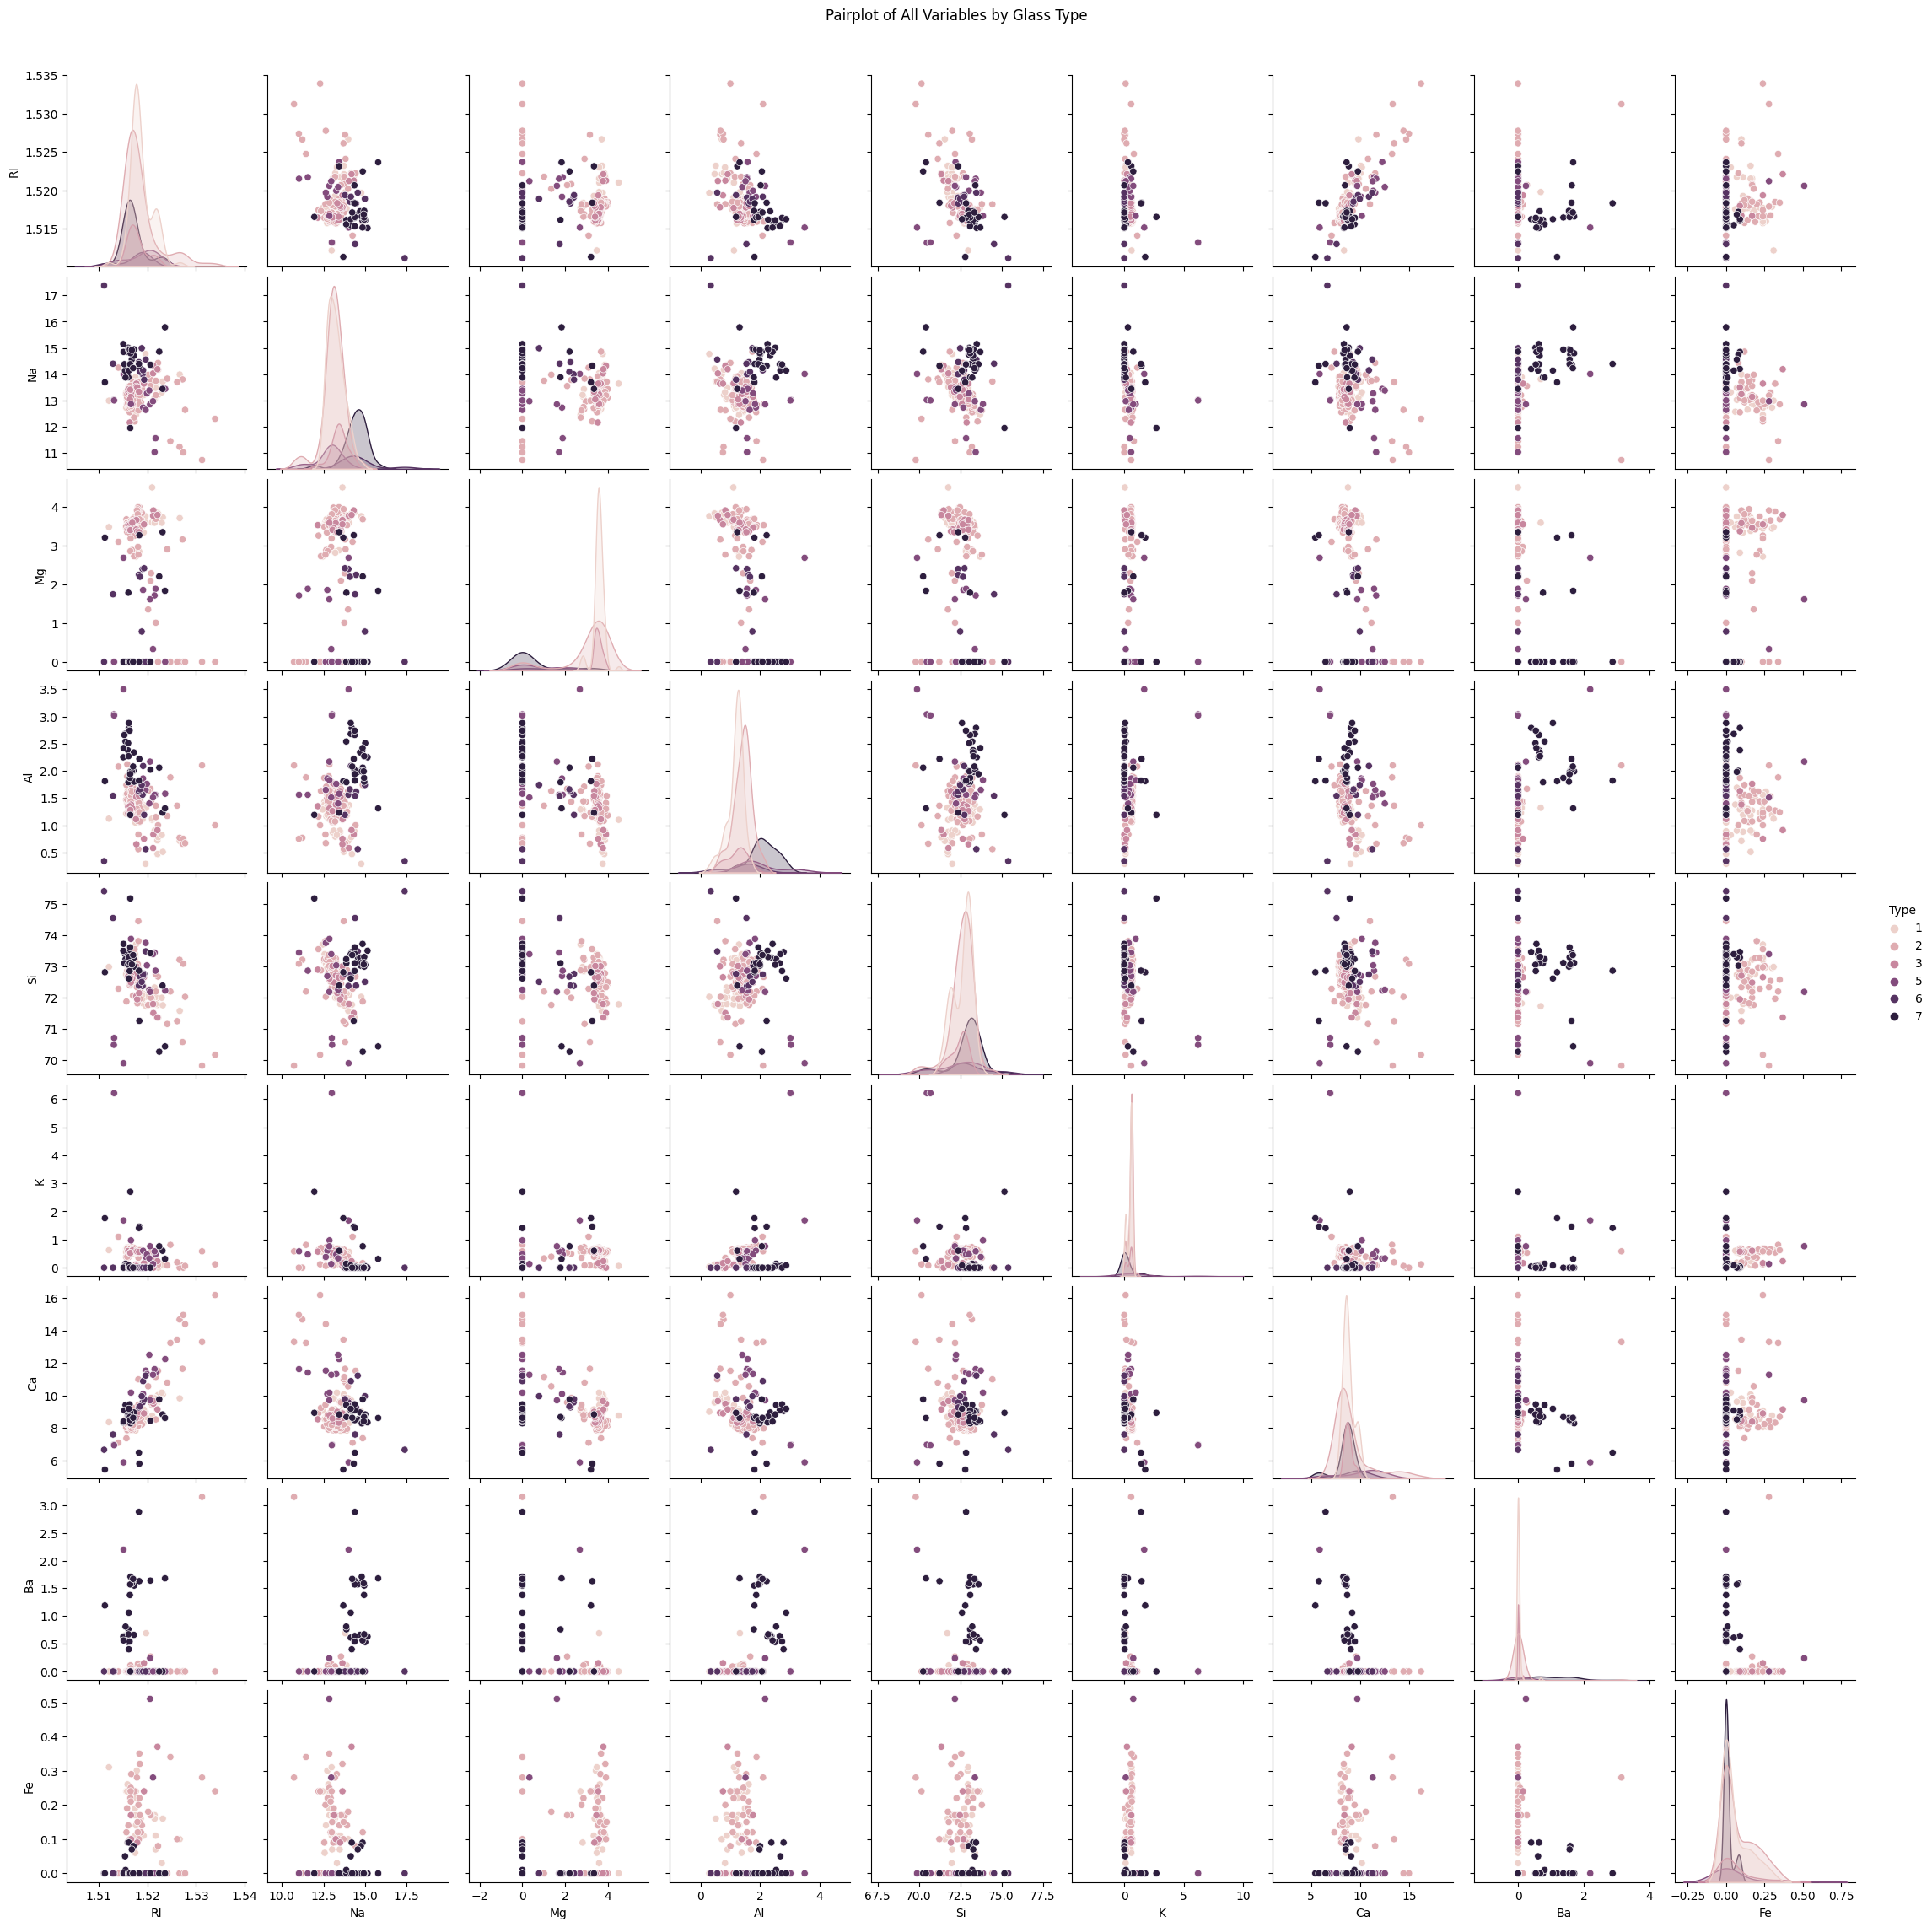

In [6]:
#Pairplot of all variables by glass type:

sns.pairplot(data, hue='Type')
plt.suptitle('Pairplot of All Variables by Glass Type', y=1.02)
plt.show()


The pairplot shows the relationships between all pairs of variables, with each point colored by the glass type. Some observations from the pairplot:

Glass types 1, 2, and 3 have similar ranges and distributions for most variables, with type 3 having slightly higher magnesium and lower aluminum values.
Glass types 5 and 6 have much higher potassium values and lower aluminum and calcium values compared to other types.
There is some separation between the types for certain variables, such as refractive index and magnesium content.
There are some strong correlations between variables, such as between refractive index and calcium content, and between aluminum and magnesium content.

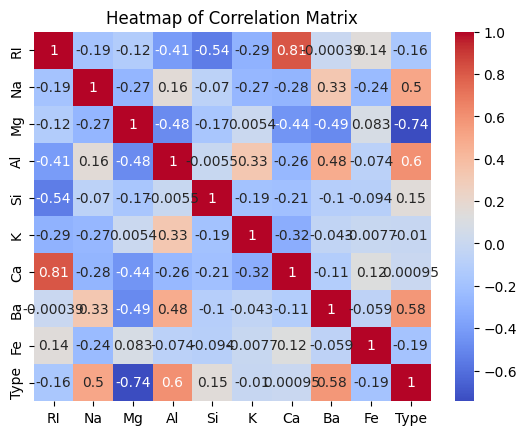

In [7]:
#Heatmap
corr_matrix = data.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()


The heatmap shows the correlation coefficients between pairs of variables, with darker shades indicating stronger positive or negative correlations. Some observations from the heatmap:

Refractive index is strongly positively correlated with calcium content and moderately positively correlated with barium content.
Aluminum and magnesium content are strongly negatively correlated.
Potassium content is strongly negatively correlated with calcium and barium content.

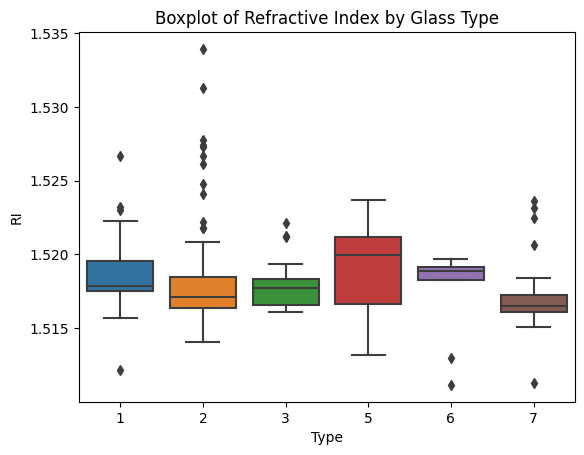

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Type', y='RI', data=data)
plt.title('Boxplot of Refractive Index by Glass Type')
plt.show()



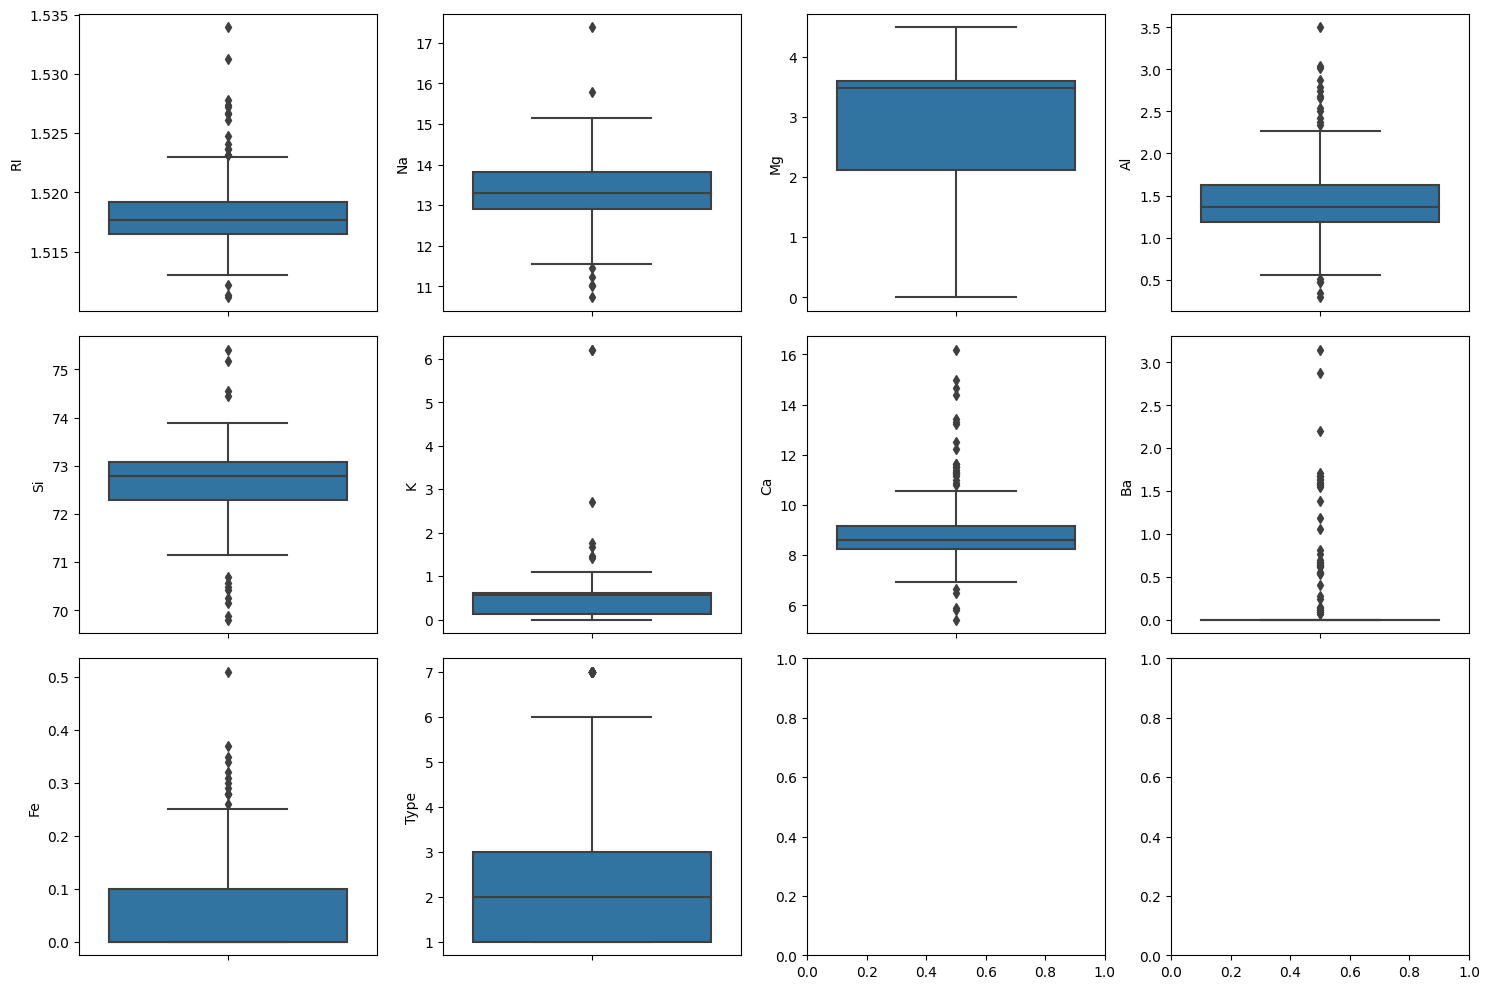

In [9]:
#Observing the Outliers

fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15,10))
index = 0
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index//4, index%4])
    index += 1
plt.tight_layout()
plt.show()



In [10]:
# Removing outliers

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]


This code removes the outliers from the dataset using the IQR (Interquartile range) method.

First, the 25th and 75th percentiles (Q1 and Q3) of each column of the dataset are calculated using the quantile() method.
Then, the IQR is calculated as the difference between Q3 and Q1.
The outliers are identified as the data points that are below (Q1 - 1.5IQR) or above (Q3 + 1.5IQR) for each column.
Finally, the any() method is used to find the rows that contain any outlier in any column, and the ~ operator is used to select the rows that do not have any outliers. These rows are then stored back in the data variable, effectively removing the outliers from the dataset.

In [11]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.0,136.000000,136.000000
mean,1.517863,13.236176,3.415588,1.344044,72.693309,0.499044,8.618088,0.0,0.043897,1.867647
std,0.001720,0.486696,0.552468,0.278500,0.489166,0.212125,0.630283,0.0,0.073577,1.120905
min,1.514090,12.160000,0.000000,0.580000,71.350000,0.000000,7.080000,0.0,0.000000,1.000000
25%,1.516622,12.877500,3.430000,1.190000,72.380000,0.487500,8.142500,0.0,0.000000,1.000000
50%,1.517610,13.210000,3.540000,1.330000,72.760000,0.570000,8.520000,0.0,0.000000,2.000000
75%,1.518445,13.480000,3.620000,1.540000,73.022500,0.610000,8.915000,0.0,0.090000,2.000000
max,1.523000,14.990000,4.490000,2.120000,73.880000,1.100000,10.560000,0.0,0.240000,6.000000


After removing the outlier, the dataset contains 136 observations instead of 214.

The mean and standard deviation values for the various features have also changed. For example, the mean value of RI has increased slightly, while the mean value of Mg has increased significantly. The standard deviation values for most features have decreased, indicating that the data points are more tightly clustered around the mean.

The maximum value for Ba is now 0, indicating that there are no observations with high Ba values in the dataset after removing the outlier.

Overall, the dataset now appears to be more representative of the majority of the glass samples, as the outlier was likely an anomaly that was skewing the data.

In [12]:
# Prepare data for KNN
X = data.drop('Type', axis=1)
y = data['Type']

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)



In [13]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Using Hyperparameter Tuning 

In [14]:


# Fit KNN model and evaluate performance
k_values = [1, 3, 5, 7, 9, 11, 13, 15]
weights = ['uniform', 'distance']
best_accuracy = 0
best_k = 0
best_weight = ''

for k in k_values:
    for w in weights:
        knn = KNeighborsClassifier(n_neighbors=k, weights=w)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_k = k
            best_weight = w
            
print(f"Best accuracy: {best_accuracy:.2f} with k={best_k} and weights='{best_weight}'")

Best accuracy: 0.79 with k=1 and weights='uniform'


In [15]:
from sklearn.neighbors import KNeighborsClassifier

# Create a new instance of KNeighborsClassifier with the best hyperparameters
knn = KNeighborsClassifier(n_neighbors=1, weights='uniform')

# Fit the model to the training data
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train KNN with the best hyperparameters
knn = KNeighborsClassifier(n_neighbors=1, weights='uniform')
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

# Calculate classification report
report = classification_report(y_test, y_pred)
print("Classification report:\n", report)


Accuracy: 0.7857142857142857
Confusion matrix:
 [[12  2  1  0]
 [ 1  8  0  0]
 [ 0  2  1  0]
 [ 0  0  0  1]]
Classification report:
               precision    recall  f1-score   support

           1       0.92      0.80      0.86        15
           2       0.67      0.89      0.76         9
           3       0.50      0.33      0.40         3
           6       1.00      1.00      1.00         1

    accuracy                           0.79        28
   macro avg       0.77      0.76      0.75        28
weighted avg       0.80      0.79      0.78        28



The KNN model has achieved an accuracy of 78.57% on the glass classification task, which is a relatively good performance. The confusion matrix shows that the model has correctly identified most of the glass types, with only a few misclassifications. The classification report provides a detailed breakdown of the model's performance on each class, including precision, recall, and f1-score. Overall, this is a positive outcome that suggests the KNN model can be used effectively for glass classification.